## Практика 4: ANOVA, MANOVA. 

### 1. ANOVA

Спочатку розглянемо одновимірний випадок, тобто ANOVA. 

Більш детально: див. 
https://rpubs.com/aaronsc32/anova-compare-more-than-two-groups  та 
https://www.scribbr.com/statistics/anova-in-r/


In [1]:
# install.packages(ggplot2)  Якщо ви працюєте з RStudio, треба завантажити пакети та відкрити біблаотеки
# installed.packages(car)
# library(ggplot2)
# library(car)

Завантажимо дані з інтернету: 

In [2]:
attach(PlantGrowth)
PlantGrowth

weight,group
4.17,ctrl
5.58,ctrl
5.18,ctrl
6.11,ctrl
4.50,ctrl
4.61,ctrl
5.17,ctrl
4.53,ctrl
5.33,ctrl
5.14,ctrl


Порівняємо вагу рослини в залежності від групи, до якої ця рослина належить. Для цього розглянемо парні діаграми. 

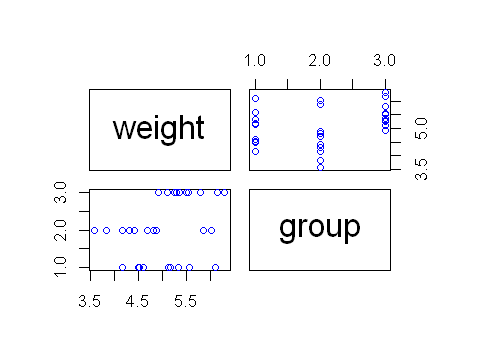

In [3]:
options(repr.plot.width=4, repr.plot.height=3)
pairs(PlantGrowth, col=" blue")      

Отже, яскраво виражені 3 групи. Застосуємо функцію  lm(..) для того, щоб задати модель лінійної регресії.

По суті, ми задаємо тим самим модель лінійної регресії,  але зараз нас цікавить не оцінка коефіцієнтів регресії (що буде зроблено пізніше,  а аналіз сум квадратів та перевірка гіпотези про рівність середніх значень.

Для тих, хто пише в RStudio: для малювання треба встановити пакети ggplot2 та car, і завантажити відповідні бібліотеки: 

library(ggplot2)

library(car)


Call:
lm(formula = weight ~ group, data = PlantGrowth)

Coefficients:
(Intercept)    grouptrt1    grouptrt2  
      5.032       -0.371        0.494  


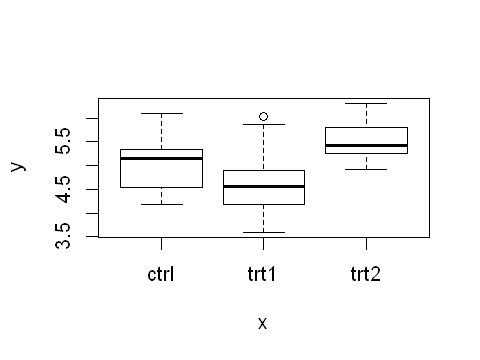

In [4]:
lm(weight ~ group, data = PlantGrowth)   # weight ~ b_0 + b_1 group1 + b_2 group 2  
plot(group, weight)

Повна інформацію про модель можна отримати, застосувавші  summary(lm()) (детальніше буде розібрано на практиці з лінійної регресії). 

In [5]:
PlantSum<-summary(lm(weight ~ group, data = PlantGrowth))    
PlantSum                                                    


Call:
lm(formula = weight ~ group, data = PlantGrowth)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4180 -0.0060  0.2627  1.3690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0320     0.1971  25.527   <2e-16 ***
grouptrt1    -0.3710     0.2788  -1.331   0.1944    
grouptrt2     0.4940     0.2788   1.772   0.0877 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6234 on 27 degrees of freedom
Multiple R-squared:  0.2641,	Adjusted R-squared:  0.2096 
F-statistic: 4.846 on 2 and 27 DF,  p-value: 0.01591


Але зараз ми дослідимо лише дисперсії. Для цього застосуємо функцію anova до нашої лінійної моделі. 

In [6]:
plant.aov <- anova(lm(weight ~ group, data = PlantGrowth))  
plant.aov

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
group,2,3.76634,1.8831700,4.846088,0.01590996
Residuals,27,10.49209,0.3885959,NA,NA


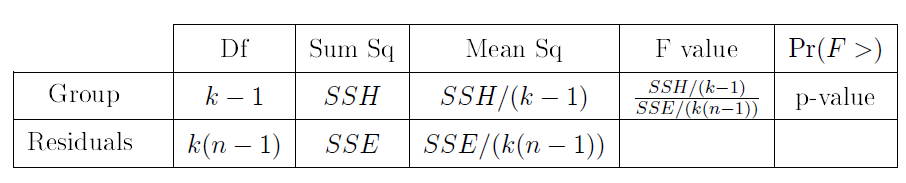

Оскільки $p$-value<0.05, то відхиляємо гіпотезу про рівність середніх. 


Альтернативно, можна зробити аналіз дисперсій за допомогою функції aov. 

In [7]:
aov(lm(weight ~ group, data = PlantGrowth))  

Call:
   aov(formula = lm(weight ~ group, data = PlantGrowth))

Terms:
                   group Residuals
Sum of Squares   3.76634  10.49209
Deg. of Freedom        2        27

Residual standard error: 0.6233746
Estimated effects may be unbalanced

Residual standard error - це  $\sqrt{Mean\, Sq}$. 

In [8]:
sqrt(0.3885959)

[1] 0.6233746

### 2.MANOVA
Розглянемо Приклад 6.1.7  з Rencher. Наведений нижче код запропоновано на сторінці https://rpubs.com/aaronsc32/manova. 
Зчитаємо  Таблицю  6.2 з Rencher: 

In [9]:
root <- read.table('T6_2_ROOT.DAT', col.names = c('V1', 'V2', 'V3', 'V4', 'V5'))

Ми позначили через  колонки наступні величини (для зручності, наведемо оригінальні назви, використані в Rencher): 

$V1$:  Номер дерева ('Tree.Number');

$V2$:   Обхват дерева через 4 роки ('Trunk.Girth.4.Years')

$V3$:    Висота через 4 роки ('Ext.Growth.4.Years')

$V4$:    Обхват дерева через 15 років ('Trunk.Girth.15.Years')

$V5:$    Вага над грунтом через 15 років.  ('Weight.Above.Ground.15.Years')

Наведемо перші 6 значень цієї таблиці (в першій колонці у нас поки лише результати для дерев з першої групи, усього в таблиці 6 груп дерев, по 8 у кожній групі, тобто  $k=6$, $n=8$; також, у нас 4 змінні, а отже, $p=4$): 

In [10]:
head(root)

V1,V2,V3,V4,V5
1,1.11,2.569,3.58,0.760
1,1.19,2.928,3.75,0.821
1,1.09,2.865,3.93,0.928
1,1.25,3.844,3.94,1.009
1,1.11,3.027,3.60,0.766
1,1.08,2.336,3.51,0.726


Далі ми подилимо дані на групи відповідно до номеру дерева та позничимо залежні змінні. Після цього ми можемо застосувати функцію  aov. 


In [12]:
root$V1 <- as.factor(root$V1)
dependent.vars <- as.matrix(read.table('T6_2_ROOT.DAT'))[,2:5]
aov(dependent.vars ~ root$V1)  

Call:
   aov(formula = dependent.vars ~ root$V1)

Terms:
                  root$V1 Residuals
V2               0.073560  0.319987
V3               4.199662 12.142790
V4               6.113935  4.290813
V5               2.493091  1.722525
Deg. of Freedom         5        42

Residual standard errors: 0.08728545 0.5376933 0.3196282 0.2025154
Estimated effects may be unbalanced

Такий самий результат дає застосування функції manova: 

Syntax: 
manova(formula, data = NULL, projections = FALSE, qr = TRUE, contrasts = NULL, …)

In [13]:
manova(dependent.vars ~ root$V1)

Call:
   manova(dependent.vars ~ root$V1)

Terms:
                  root$V1 Residuals
V2               0.073560  0.319987
V3               4.199662 12.142790
V4               6.113935  4.290813
V5               2.493091  1.722525
Deg. of Freedom         5        42

Residual standard errors: 0.08728545 0.5376933 0.3196282 0.2025154
Estimated effects may be unbalanced

Residual standard errors: $\sqrt{Residuals/(Deg. of Freedom)}$: 

In [ ]:
sqrt(0.319987/42)

Або, у розгорнотому вигляді, 

In [14]:
summary(aov(dependent.vars ~ root$V1))

 Response V2 :
            Df  Sum Sq   Mean Sq F value Pr(>F)
root$V1      5 0.07356 0.0147121   1.931 0.1094
Residuals   42 0.31999 0.0076187               

 Response V3 :
            Df  Sum Sq Mean Sq F value Pr(>F)  
root$V1      5  4.1997 0.83993  2.9052 0.0243 *
Residuals   42 12.1428 0.28911                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response V4 :
            Df Sum Sq Mean Sq F value    Pr(>F)    
root$V1      5 6.1139 1.22279  11.969 3.112e-07 ***
Residuals   42 4.2908 0.10216                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response V5 :
            Df Sum Sq Mean Sq F value    Pr(>F)    
root$V1      5 2.4931 0.49862  12.158 2.587e-07 ***
Residuals   42 1.7225 0.04101                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Розберемо, що знаходиться в цій таблиці.  

Перша колонка- це кількість  ступенів свободи: $\nu_H = k-1=5$  та $\nu_E= k(n-1)= 6* 7=42$. Друга колонка- це діагональні елементи матриць $H$ та $E$, відповідно.    Ці матриці можна отримани  з MANOVA  наступним чином: 

In [15]:
root.manova <- summary(manova(dependent.vars ~ root$V1))
H <- root.manova$SS[1]
E <- root.manova$SS[2]
H

,V2,V3,V4,V5
V2,0.07356042,0.5373852,0.3322646,0.208470
V3,0.53738521,4.1996619,2.3553885,1.637108
V4,0.33226458,2.3553885,6.1139354,3.781044
V5,0.20847000,1.6371084,3.7810437,2.493091


In [16]:
E

,V2,V3,V4,V5
V2,0.3199875,1.696564,0.5540875,0.217140
V3,1.6965637,12.142790,4.3636125,2.110214
V4,0.5540875,4.363612,4.2908125,2.481656
V5,0.2171400,2.110214,2.4816562,1.722525


Код обчислення  $E$ і $H$:  https://rpubs.com/aaronsc32/manova

Числа в третій колонці- це числа у другій колонці, поділені на кількість ступенів свободи, тобто на відповідні числа  у першій колонці. Числа у четвертій колонці- це відношення зваженої суми квадратів, що відповідає змінній, і суми квадратів, що відповідає залишкам, тобто, наприклад, для першої змінної $0.0147121/0.0076187=
1.931051$. Як і в попередньому розділі, за умови гіпотези $H_0$ -- це відношення має розподіл Фішера. Остання колонка-- це $p$-value. 

З іншого боку, можна застосувати summary(manova) для того, щоб перевірити гіпотезу  $H_0$ про те, всі групи мають однакові середні.  Для цього треба подивитися результат  root.manova: 

In [17]:
root.manova

          Df Pillai approx F num Df den Df    Pr(>F)    
root$V1    5 1.3055   4.0697     20    168 1.983e-07 ***
Residuals 42                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Тобто, використання  root.manova дає нам значення статистики Пілая
$$
	V^{(s)} = trace [ (E+H)^{-1} H]= \sum_{i=1}^s \frac{\lambda_i}{1+\lambda_i}. 
$$  
Маємо: $\nu_H= k-1=5$, $\nu_E= k(n-1)= 42$, $p=4$, 
 $m:=\frac{|p-\nu_H|-1}{2}=0$, $w:=(\nu_E-p-1)/2$, $s=4$ (у нашому випадку це розмірність).  Випадкова величина 
$$
\frac{(2w+s+1)V^{(s)}}{(2m+s+1)(s-V^{(s)})}\sim F_{s(2w+s+1),  s(2n+s+1)}
$$
має за виконання гіпотези розподіл Фішера $F_{20,168}$. 

Для того, щоб обчислити це значення вручну, застосуємо матриці  $E$ та $H$. 
Вище ми зчитали матриці $E$ та $H$ як таблиці. Перетворимо їх у матриці та обчислимо стетистику Пілая:  

In [18]:
E1 <- as.matrix(E$Residuals)
H1 <- as.matrix(H$`root$V1`)
Vs <- sum(diag(solve(E1 + H1) %*% H1)) 
round(Vs,4)

[1] 1.3055

In [19]:
F = (42*Vs)/(5*(4-Vs))
round(F,4)

[1] 4.0697

Можна перевірити, що  $p$-value дуже мале. 

Можна також використати інші тести, які вбудовані у функцію manova: 

In [21]:
#summary(manova(dependent.vars ~ root$V1), test="Wilks")
# summary(manova(dependent.vars ~ root$V1), test="Roy")
# summary(manova(dependent.vars ~ root$V1), test="Hotelling-Lawley")
summary(manova(dependent.vars ~ root$V1), test="Pillai")

          Df Pillai approx F num Df den Df    Pr(>F)    
root$V1    5 1.3055   4.0697     20    168 1.983e-07 ***
Residuals 42                                            
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [28]:
summary(manova(dependent.vars ~ root$V1), test="Wilks")

          Df   Wilks approx F num Df den Df    Pr(>F)    
root$V1    5 0.15401   4.9369     20  130.3 7.714e-09 ***
Residuals 42                                             
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [56]:
ev <- eigen(solve(E1)%*% H1)
ev

eigen() decomposition
$values
[1] 1.87567112 0.79069454 0.22904907 0.02595357

$vectors
            [,1]        [,2]       [,3]        [,4]
[1,] -0.55337105  0.08340397 -0.1521720  0.97955535
[2,]  0.30911038  0.08894955  0.2539187 -0.12869430
[3,] -0.76855963 -0.52426558  0.4623164 -0.08413202
[4,]  0.08687548  0.84277954 -0.8358424  0.12973396
